# Linear Regression

Step‑by‑step NumPy implementation of ordinary least‑squares linear regression
using **both**:

1. Analytical *Normal Equation*  
2. Iterative *Gradient Descent*


## 1. Quick Theory Recap

### 1.1 Model  

\[
\hat{y} = \mathbf{x}^{\top}\theta
\]

### 1.2 Loss (mean‑squared error)  

\[
\mathcal{L}(\theta) = \frac{1}{N}\lVert \mathbf{y} - \mathbf{X}\theta\rVert_2^{2}
\]

### 1.3 Two solutions  

* **Normal Equation**  

\[
\theta^{\*} = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{y}
\]

* **Gradient Descent**  

\[
\theta \leftarrow \theta - \eta \nabla_\theta\mathcal{L}
\quad\text{with}\quad
\nabla_\theta\mathcal{L} = -\frac{2}{N}\mathbf{X}^{\top}(\mathbf{y}-\mathbf{X}\theta)
\]

### 2. Imports & synthetic data

In [14]:

# Standard stack
import numpy as np
import matplotlib.pyplot as plt

# 2.1 Reproducibility
np.random.seed(0)

# 2.2 Ground‑truth line: y = 3x + 4
TRUE_W = 3.0
TRUE_B = 4.0

# 2.3 Draw 100 x values in [0, 2]
N_SAMPLES = 100
X = 2 * np.random.rand(N_SAMPLES, 1)

# 2.4 Add Gaussian noise
noise = np.random.randn(N_SAMPLES, 1)

# 2.5 Targets
y = TRUE_W * X + TRUE_B + noise

# 2.6 Design‑matrix with bias column
X_b = np.c_[np.ones((N_SAMPLES, 1)), X]

print(f'Design‑matrix shape: {X_b.shape} | Target shape: {y.shape}')


Design‑matrix shape: (100, 2) | Target shape: (100, 1)


### 3. Helper functions

In [15]:

def predict(X, theta):
    """Compute ŷ = Xθ."""
    return X @ theta

def mse_loss(theta, X, y):
    """Mean‑squared error: (1/N) * ||y - Xθ||^2"""
    residuals = y - predict(X, theta)
    return np.mean(residuals ** 2)

def gradient(theta, X, y):
    """Analytical gradient of MSE."""
    residuals = y - predict(X, theta)
    return -(2 / len(X)) * X.T @ residuals


### 4. Closed‑form solution (Normal Equation)

In [16]:

theta_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print('θ₀ (bias) [normal eq.] :', theta_normal[0, 0])
print('θ₁ (weight) [normal eq.] :', theta_normal[1, 0])

normal_mse = mse_loss(theta_normal, X_b, y)
print(f'MSE (Normal Equation): {normal_mse:.3f}')


θ₀ (bias) [normal eq.] : 4.22215107744723
θ₁ (weight) [normal eq.] : 2.968467510701018
MSE (Normal Equation): 0.992


### 5. Iterative solution (Gradient Descent)

In [17]:

LEARNING_RATE = 0.1
MAX_ITERS = 1000
TOLERANCE = 1e-8

theta_gd = np.random.randn(2, 1)

for step in range(MAX_ITERS):
    grad = gradient(theta_gd, X_b, y)
    theta_gd -= LEARNING_RATE * grad

    if step % 200 == 0:
        print(f'step {step:4d} | loss = {mse_loss(theta_gd, X_b, y):.4f}')

    if np.linalg.norm(grad) < TOLERANCE:
        print(f'Converged after {step} iterations')
        break

print('\nθ₀ (bias) [grad. desc.] :', theta_gd[0, 0])
print('θ₁ (weight) [grad. desc.] :', theta_gd[1, 0])

gd_mse = mse_loss(theta_gd, X_b, y)
print(f'MSE (Gradient Descent): {gd_mse:.3f}')


step    0 | loss = 29.1488
step  200 | loss = 0.9924
step  400 | loss = 0.9924
Converged after 510 iterations

θ₀ (bias) [grad. desc.] : 4.22215105531418
θ₁ (weight) [grad. desc.] : 2.968467530340332
MSE (Gradient Descent): 0.992


### 6. Visual comparison

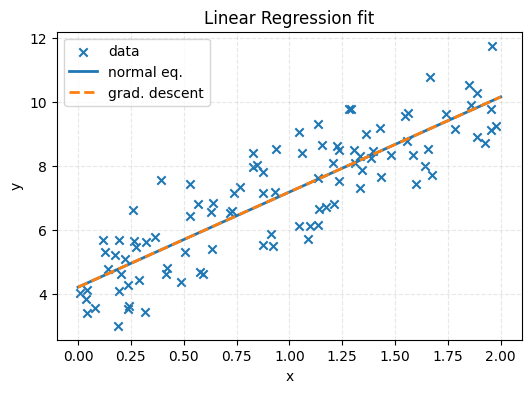

In [18]:

plt.figure(figsize=(6,4))
plt.scatter(X, y, label='data', marker='x')

x_line = np.array([[0], [2]])
x_line_b = np.c_[np.ones((2,1)), x_line]

plt.plot(x_line, predict(x_line_b, theta_normal), label='normal eq.', linewidth=2)
plt.plot(x_line, predict(x_line_b, theta_gd), label='grad. descent', linestyle='--', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 7. Next steps

* **Regularisation** – add a \(\lambda I\) term to \(X^\top X\) for Ridge,
  or penalise the L1‑norm for Lasso.  
* **Polynomial features** – expand \(x\) into \(x^2, x^3, …\) for non‑linear
  trends while keeping linear parameters.  
* **Stochastic / Mini‑batch GD** – sample small chunks of data each update for
  huge datasets.  
* **Online learning** – update parameters in real‑time as new data streams in.
